MAU for the years of 2019 to 2024 in % 

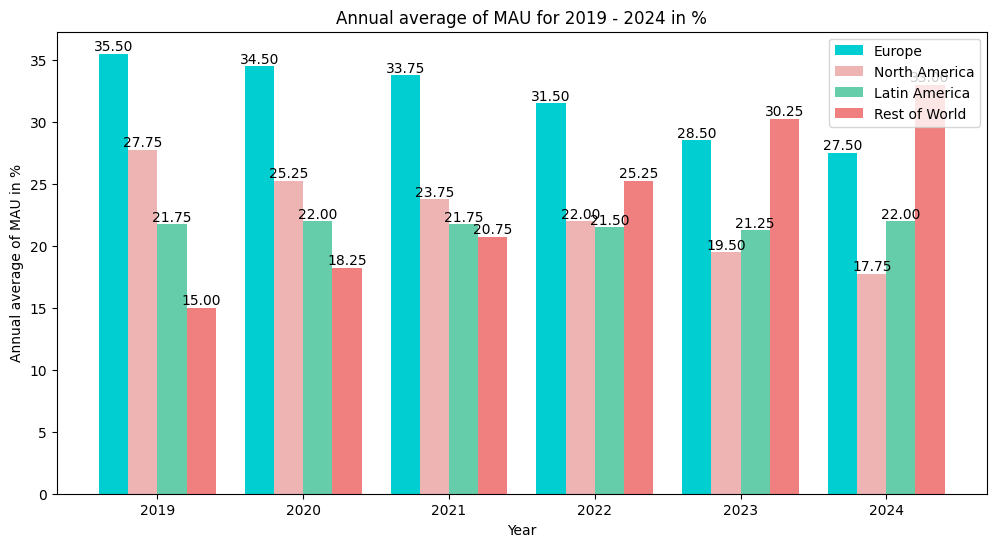

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file & ignore first line
file_path = "MAU ALL.csv"
with open(file_path, "r", encoding="utf-8") as file:
    content = file.readlines()

data = {}
current_year = None

for line in content[1:]:  # Ignore first line
    line = line.strip()
    if not line:
        continue
    
    if line.endswith(":"):  # Regonize year
        current_year = line.replace(":", "").strip()
        data[current_year] = {}
    elif "=" in line:
        region, value = line.split("=")
        data[current_year][region.strip()] = float(value.strip())

# Change data to DataFrame
df = pd.DataFrame.from_dict(data, orient="index")
df = df.sort_index(ascending=True)

# Define colors for each region
colors = {
    "Europe": "#00ced1",
    "North America": "#cd1076",
    "Latin America": "#66cdaa",
    "Rest of World": "#f08080"
}

years = df.index.astype(str)
regions = df.columns
values = df.values

x = np.arange(len(years))  # Position of the years on the x-axis
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Create bar chart
for i, region in enumerate(regions):
    bars = ax.bar(x + (i - 1.5) * width, values[:, i], width, label=region, color=colors[region])

    # Add values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, title, legend, etc.
ax.set_xlabel("Year")
ax.set_ylabel("Annual average of MAU in %")
ax.set_title("Annual average of MAU for 2019 - 2024 in %")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

plt.show()
